# Lab4. 神经网络识别手写数字

In [95]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

"""函数定义"""

def loaddata(path):
    data=loadmat(path)
    return data


def sigmoid(z):
    return 1/(1+np.exp(-z))


# 随机生成100张图片
def displayData(x):
    indexs=np.random.choice(x.shape[0],100)
    images=x[indexs]
    fig,axs=plt.subplots(10,10,figsize=(20,20))
    for row in range(10):
        for col in range(10):
            axs[row,col].matshow(images[row*10+col].reshape(20,20).T,cmap='gray_r')
    plt.show()

# one-hot 编码
def oneHotEncoder(arr):
    m = arr.shape[0]
    arr_onehot = np.zeros((m, 10))
    for i in range(m):
        arr_onehot[i][arr[i]-1] = 1
    return arr_onehot


# 计算sigmoid函数的梯度
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))


## 以下是你需要完成的函数

In [96]:
def forward_propagate(X, theta1, theta2):
    """完成此部分代码"""
    a1 = X.T
    a1 = np.insert(a1,0,values=1,axis=0)#(401,5000)
    z2 = theta1@a1
    z2 = np.insert(z2,0,values=1,axis=0)
    a2 = sigmoid(z2) # (26,5000)
    z3 = theta2@a2
    a3 = sigmoid(z3)
    return a1.T, z2.T, a2.T, z3.T, a3.T

cost函数与backprop前半部分一致，为可选部分

In [97]:
def cost(params, input_size, hidden_size, num_labels, X, y, lmbd):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    # 将参数数组重新塑造为每一层的参数矩阵
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

    # 运行向前传播函数
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)

    # 计算代价函数
    """完成此部分代码"""
    J = -np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    J/=m
    # 加上正则化项
    """完成此部分代码"""
    reg = lmbd*(np.sum(theta1[:,1:]**2)+np.sum(theta2[:,1:]**2))/(2*m)
    J += reg

    return J # 返回值为标量

In [98]:
# 反向传播算法
# 扩展代价函数以执行反向传播并返回代价和梯度
def backprop(params, input_size, hidden_size, num_labels, X, y, lmbd):
    m = X.shape[0]
    X = np.array(X)
    y = np.array(y) #(5000,10)
    # 将参数数组重新塑造为每一层的参数矩阵
    theta1 = np.array(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.array(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

    # 运行feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)

    # 初始化
    J = 0
    delta1 = np.zeros(theta1.shape)     #  (25, 401)
    delta2 = np.zeros(theta2.shape)     #  (10, 26)

    # 计算代价函数
    """完成此部分代码"""
    J = -np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    J/=m
    # 加上正则化项
    """完成此部分代码"""
    reg = lmbd*(np.sum(theta1[:,1:]**2)+np.sum(theta2[:,1:]**2))/(2*m)
    J += reg
    # 执行反向传播
    """完成此部分代码"""
    d3 = h-y #(5000,10)
    d2 = d3@theta2*sigmoid_gradient(z2) #  (5000, 26)
    delta1 += (d2[:,1:]).T@a1 #(25,401)
    delta2 += d3.T@a2
    delta1 /= m
    delta2 /= m
    # 加上梯度正则化项
    """完成此部分代码"""
    delta1[:,1:] +=  (theta1[:,1:] * lmbd) / m
    delta2[:,1:] +=  (theta2[:,1:] * lmbd) / m
    # 将梯度矩阵分解为单个数组
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))

    return J, grad

## 运行代码进行实验 

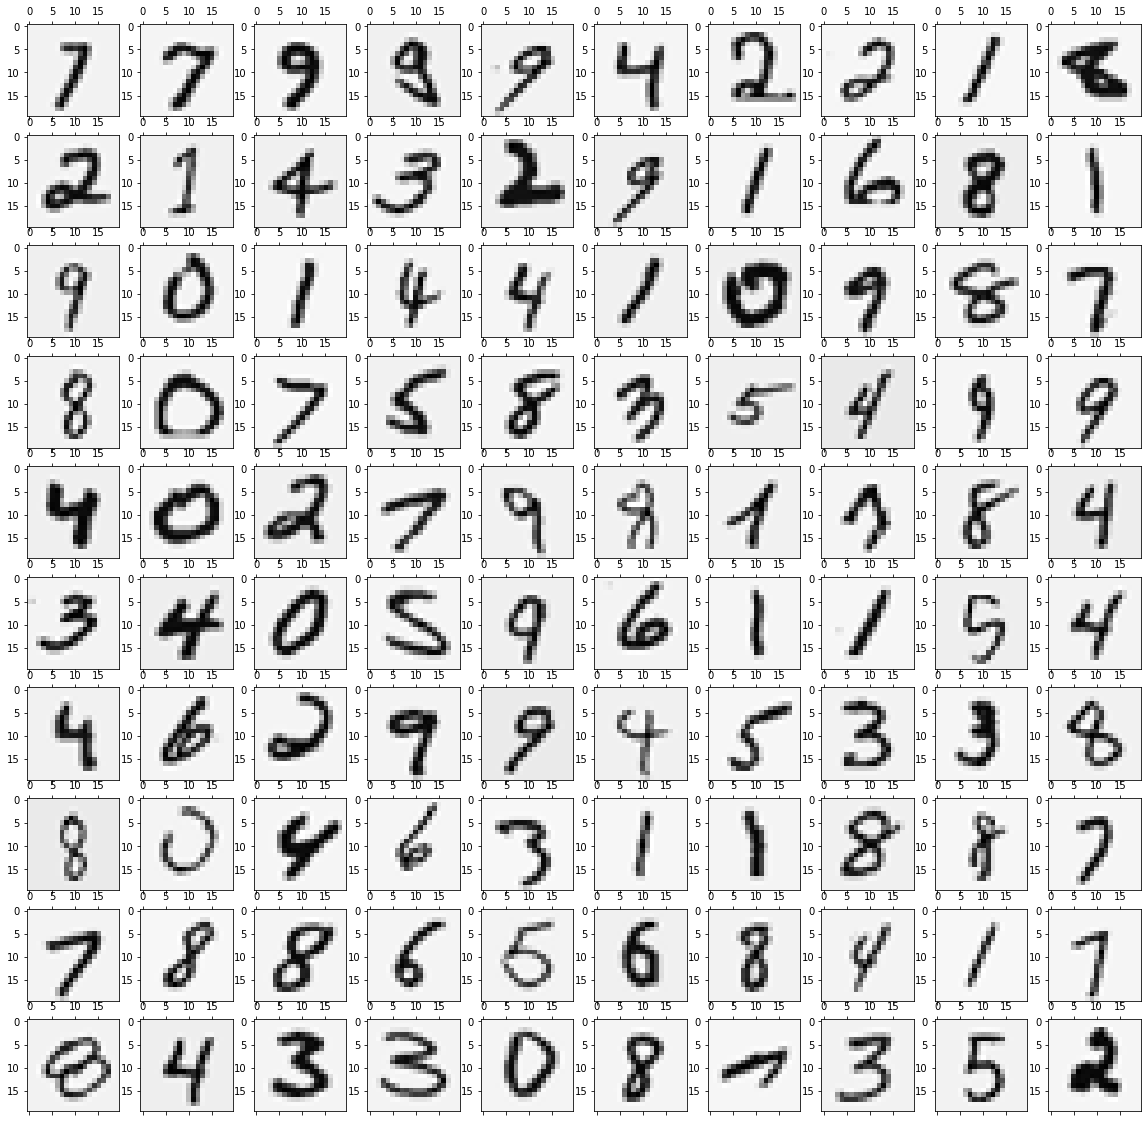

In [99]:
from scipy.io import loadmat
# 加载数据
data=loaddata('ex4data1.mat')
X = data['X']
y = data['y']
displayData(X)

# 对y标签进行一次one-hot编码
# one-hot 编码将类标签n（k类）转换为长度为k的向量，其中索引n为“hot”（1），而其余为0
y_onehot = oneHotEncoder(y)
# for i in range(y_hot.shape[0]):
#     print(y_onehot[i])

In [100]:
# 初始化设置
# 确定输入层和输出层的单元数
input_size = 400 # 输入层单元
hidden_size = 25 # 隐藏层单元
num_labels = 10  # 输出层单元
lmbd = 1 # 正则化系数

# 随机初始化完整网络参数大小的参数数组
# 通常会把权重初始化为很小的值，接近于0
np.random.seed(7)
params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25

m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)

# 将参数数组解开为每个层的参数矩阵
theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
(theta1.shape, theta2.shape)

((25, 401), (10, 26))

## test

In [101]:
J, grad = backprop(params, input_size, hidden_size, num_labels, X, y_onehot, lmbd)
J, grad.shape

(6.579652295817373, (10285,))

In [102]:
from scipy.optimize import minimize

fmin = minimize(fun=backprop,
                x0=params,
                args=(input_size, hidden_size, num_labels, X, y_onehot, lmbd),
                method='TNC',
                jac=True,
                options={'maxiter': 250})

In [103]:
print(fmin)

     fun: 0.34497771002350386
     jac: array([-1.92404627e-04,  1.92464472e-06, -5.34413564e-07, ...,
       -3.43273489e-05, -6.01761342e-05, -1.99272126e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 251
     nit: 20
  status: 3
 success: False
       x: array([ 0.26780769,  0.00962322, -0.00267207, ...,  0.15312249,
       -0.79071287, -1.78887456])


In [104]:
X = np.matrix(X)
theta1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
y_pred = np.array(np.argmax(h, axis=1) + 1)


# 计算准确度
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 99.11999999999999%
